In [1]:
using LinearAlgebra
using Plots
using NLsolve
include("mod_chap7.jl")
using .mod_chap7

In [2]:
function main(ind_E)

    p = Params(ind_E = ind_E)

    # INITIAL GUESS FOR ASSET DECISIONS
    # a(2) to a(Nj) (NOTE a(1)=a(Nj+1)=0)
    a_g = Vector(LinRange(0.01, 0.01 * (p.Nj - 1),  p.Nj - 1))

    policyA!(a) = policyA(p, a)

    res = nlsolve(policyA!, a_g)

    a = zeros(p.Nj + 1)
    @views a[2:p.Nj] = res.zero

    @views K = dot(a[1:p.Nj], p.meaJ)

    r = p.α * (K / p.L)^(p.α - 1) - p.δ # INTEREST RATE
    w = (1 - p.α) * (K / p.L)^p.α  # WAGE

    ss = p.ss0 * w

    c = zeros(p.Nj)
    for j in 1:p.Nj
        c[j] = (1.0 - p.τ) * w * p.θ[j] + (1.0 + r) * a[j] + ss[j] - a[j + 1]
    end

    return p, a, c
end


main (generic function with 1 method)

In [3]:
# baseline
ind_E = 1
p, a1, c1 = main(ind_E)
ageA = Vector(UnitRange(1, p.Nj + 1)) .+ 19
ageC = Vector(UnitRange(1, p.Nj)) .+ 19


minJ = 20
maxJ = 19 + p.Nj

norm = c1[1]

# Senario1
ind_E = 2
p, a2, c2 = main(ind_E)
# Senario 2
ind_E = 3
p, a3, c3 = main(ind_E)
# Senario 3
ind_E = 4
p, a4, c4 = main(ind_E);
ageA_extend = Vector(UnitRange(1, p.Nj + 1)) .+ 19
ageC_extend = Vector(UnitRange(1, p.Nj)) .+ 19
minJ_extend = 20
maxJ_extend = 19 + p.Nj

85

記事中の図1は次のように書くことができる。

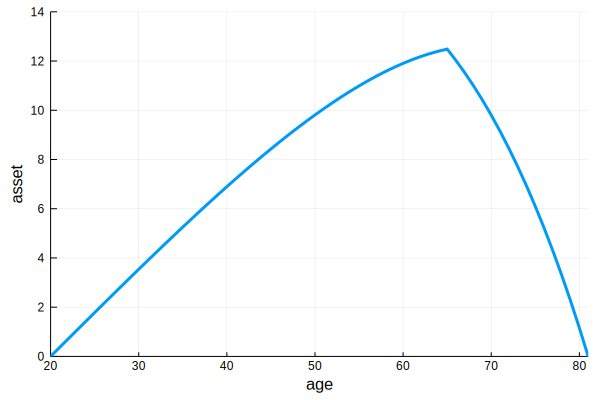

In [4]:
plot(ageA,a1./norm, linewidth =3, label = "")
ylims!(0, 14)
xlims!(minJ, maxJ+1)
ylabel!("asset")
xlabel!("age")

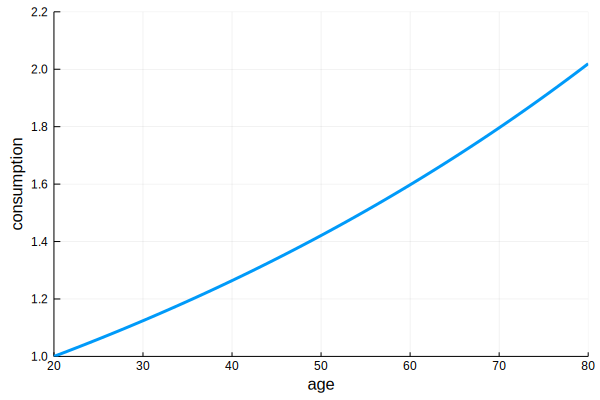

In [5]:
plot(ageC, c1./norm, linewidth =3, label="")
ylims!(1.0, 2.2)
xlims!(minJ, maxJ)
ylabel!("consumption")
xlabel!("age")

同様にして連載内図2を再現した。

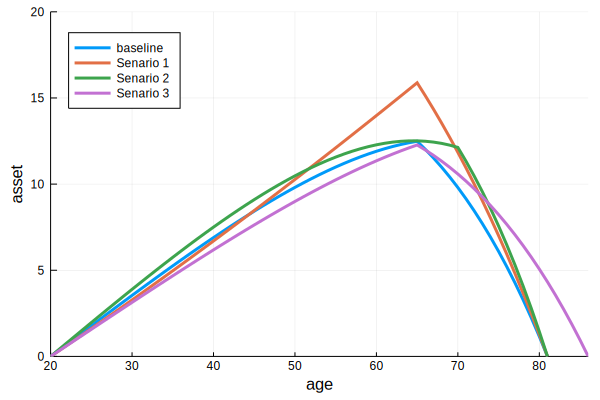

In [6]:
plot(ageA,a1./norm, linewidth =3, label = "baseline", legend = :topleft)
plot!(ageA, a2./norm,  linewidth =3, label = "Senario 1")
plot!(ageA, a3./norm,  linewidth =3, label = "Senario 2")
plot!(ageA_extend, a4./norm, linewidth =3, label = "Senario 3")
ylims!(0, 20)
xlims!(minJ, maxJ_extend+1)
ylabel!("asset")
xlabel!("age")

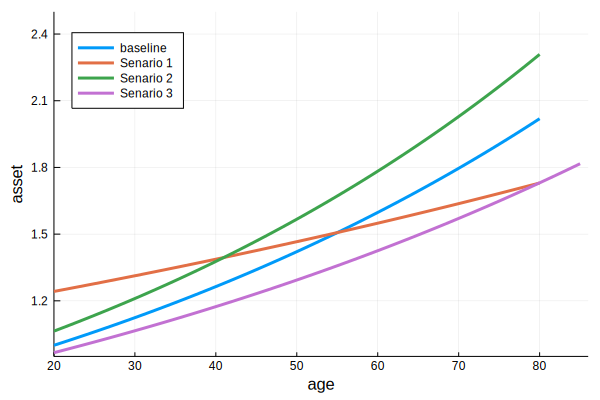

In [7]:
plot(ageC,c1./norm, linewidth =3, label = "baseline", legend = :topleft)
plot!(ageC, c2./norm,  linewidth =3, label = "Senario 1")
plot!(ageC, c3./norm,  linewidth =3, label = "Senario 2")
plot!(ageC_extend, c4./norm, linewidth =3, label = "Senario 3")
ylims!(0.95, 2.5)
xlims!(minJ, maxJ_extend+1)
ylabel!("asset")
xlabel!("age")